In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("laptop_price.csv", encoding="latin-1")

In [3]:
df = df.drop("Product", axis=1)

In [4]:
df = df.join(pd.get_dummies(df.Company, dtype=int))
df = df.drop("Company", axis=1)

In [5]:
df = df.join(pd.get_dummies(df.TypeName, dtype=int))
df = df.drop("TypeName", axis=1)

In [6]:
df["ScreenResolution"] = df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])
df["Screen Width"] = df.ScreenResolution.str.split("x").apply(lambda x: x[0])
df["Screen Height"] = df.ScreenResolution.str.split("x").apply(lambda x: x[1])
df = df.drop("ScreenResolution", axis=1)

In [7]:
df["CPU Brand"] = df.Cpu.str.split(" ").apply(lambda x: x[0])
df["CPU Frequency"] = df.Cpu.str.split(" ").apply(lambda x: x[-1])
df = df.drop("Cpu", axis=1)
df["CPU Frequency"] = df["CPU Frequency"].str[:-3]

In [8]:
df["Ram"] = df["Ram"].str[:-2]

In [9]:
df["Screen Width"] = df["Screen Width"].astype("int")
df["Screen Height"] = df["Screen Height"].astype("int")
df["CPU Frequency"] = df["CPU Frequency"].astype("float")
df["Ram"] = df["Ram"].astype("int")

In [10]:
df["Memory Amount"] = df.Memory.str.split(" ").apply(lambda x: x[0])
df["Memory Type"] = df.Memory.str.split(" ").apply(lambda x: x[1])

In [11]:
def turn_memory_into_MB(value):
    try:
        value = str(value).upper().replace(" ", "").replace("+", " + ")
        parts = value.split("+")
        total = 0
        for part in parts:
            if "GB" in part:
                total += float(part.replace("GB", "").replace("SSD", "").replace("HDD", "").replace("FLASHSTORAGE", "")) * 1000
            elif "TB" in part:
                total += float(part.replace("TB", "").replace("SSD", "").replace("HDD", "").replace("FLASHSTORAGE", "")) * 1000000
        return total
    except Exception as e:
        print(f"Erro ao processar memória: {value} => {e}")
        return None

In [12]:
df["Memory Amount"]= df["Memory Amount"].apply(turn_memory_into_MB)
df = df.drop("Memory Type", axis=1)

In [13]:
df = df.drop("Memory", axis=1)

In [14]:
df["Weight"] = df["Weight"].str[:-2].astype("float")

In [15]:
df["GPU Brand"] = df.Gpu.str.split(" ").apply(lambda x: x[0])
df = df.drop("Gpu", axis=1)

In [16]:
df = df.join(pd.get_dummies(df.OpSys, dtype=int))
df = df.drop("OpSys", axis=1)

In [17]:
cpu_categories = pd.get_dummies(df["CPU Brand"], dtype=int)
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns] 

df = df.join(cpu_categories)
df = df.drop("CPU Brand", axis=1)

In [18]:
gpu_categories = pd.get_dummies(df["GPU Brand"], dtype=int)
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns] 

df = df.join(gpu_categories)
df = df.drop("GPU Brand", axis=1)

<Axes: >

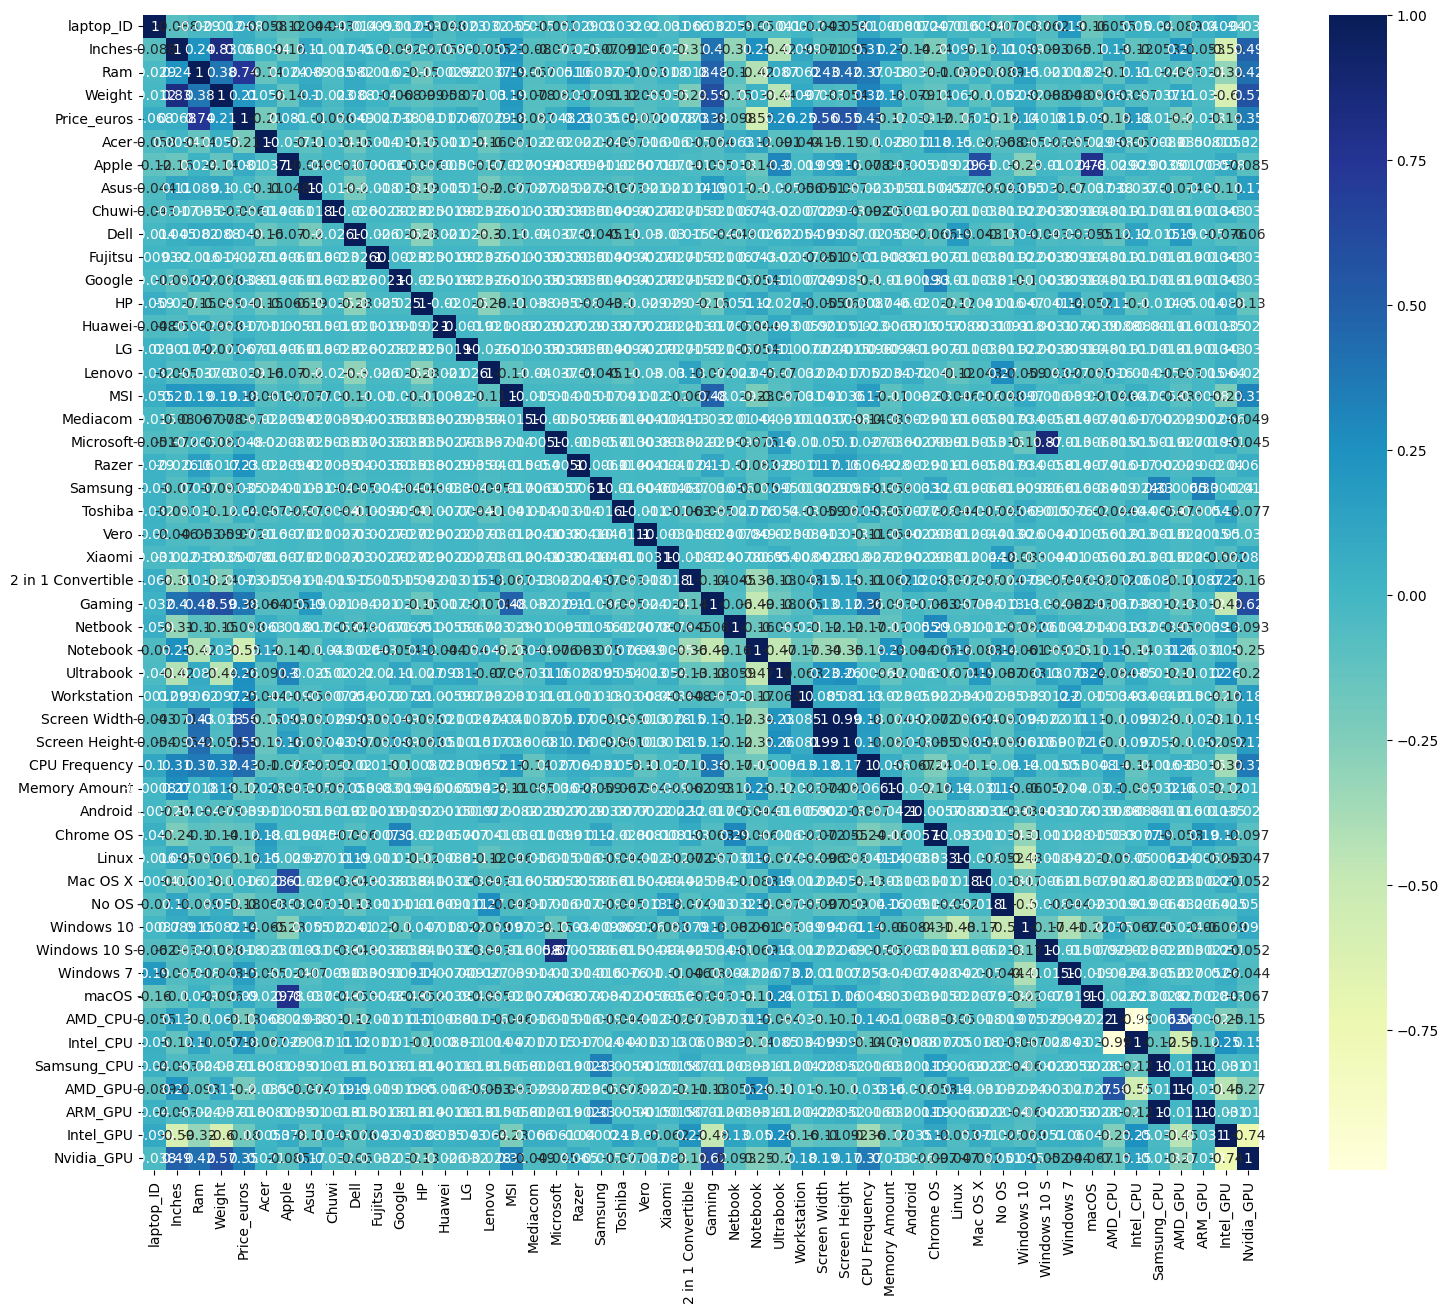

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [20]:
target_correlations = df.corr()['Price_euros'].apply(abs).sort_values()

In [21]:
target_correlations

Xiaomi                0.000776
Asus                  0.010376
Mac OS X              0.015656
Huawei                0.016851
Windows 10 S          0.018312
Samsung_CPU           0.018431
ARM_GPU               0.018431
Fujitsu               0.027135
Lenovo                0.029007
Samsung               0.034584
Google                0.038086
Android               0.038700
Toshiba               0.040339
HP                    0.041291
Microsoft             0.047562
Dell                  0.048509
Chuwi                 0.055646
LG                    0.067053
laptop_ID             0.067830
Inches                0.068197
Vero                  0.071972
2 in 1 Convertible    0.072675
Apple                 0.080688
Mediacom              0.087161
macOS                 0.089928
Netbook               0.097572
Chrome OS             0.118684
Memory Amount         0.122365
Windows 10            0.137048
Windows 7             0.152381
Linux                 0.162060
No OS                 0.177094
MSI     

In [22]:
selected_features = target_correlations[-21:].index

In [23]:
selected_features = list(selected_features)

In [24]:
selected_features

['Windows 7',
 'Linux',
 'No OS',
 'MSI',
 'AMD_CPU',
 'Intel_CPU',
 'Intel_GPU',
 'AMD_GPU',
 'Acer',
 'Weight',
 'Razer',
 'Workstation',
 'Ultrabook',
 'Nvidia_GPU',
 'Gaming',
 'CPU Frequency',
 'Notebook',
 'Screen Height',
 'Screen Width',
 'Ram',
 'Price_euros']

In [25]:
limited_df = df[selected_features]

In [26]:
limited_df

,Windows 7,Linux,No OS,MSI,AMD_CPU,Intel_CPU,Intel_GPU,AMD_GPU,Acer,Weight,...,Workstation,Ultrabook,Nvidia_GPU,Gaming,CPU Frequency,Notebook,Screen Height,Screen Width,Ram,Price_euros
0,0,0,0,0,0,1,1,0,0,1.37,...,0,1,0,0,2.3,0,1600,2560,8,1339.69
1,0,0,0,0,0,1,1,0,0,1.34,...,0,1,0,0,1.8,0,900,1440,8,898.94
2,0,0,1,0,0,1,1,0,0,1.86,...,0,0,0,0,2.5,1,1080,1920,8,575.00
3,0,0,0,0,0,1,0,1,0,1.83,...,0,1,0,0,2.7,0,1800,2880,16,2537.45
4,0,0,0,0,0,1,1,0,0,1.37,...,0,1,0,0,3.1,0,1600,2560,8,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,0,0,0,1,1,0,0,1.80,...,0,0,0,0,2.5,0,1080,1920,4,638.00
1299,0,0,0,0,0,1,1,0,0,1.30,...,0,0,0,0,2.5,0,1800,3200,16,1499.00
1300,0,0,0,0,0,1,1,0,0,1.50,...,0,0,0,0,1.6,1,768,1366,2,229.00
1301,0,0,0,0,0,1,0,1,0,2.19,...,0,0,0,0,2.5,1,768,1366,6,764.00


<Axes: >

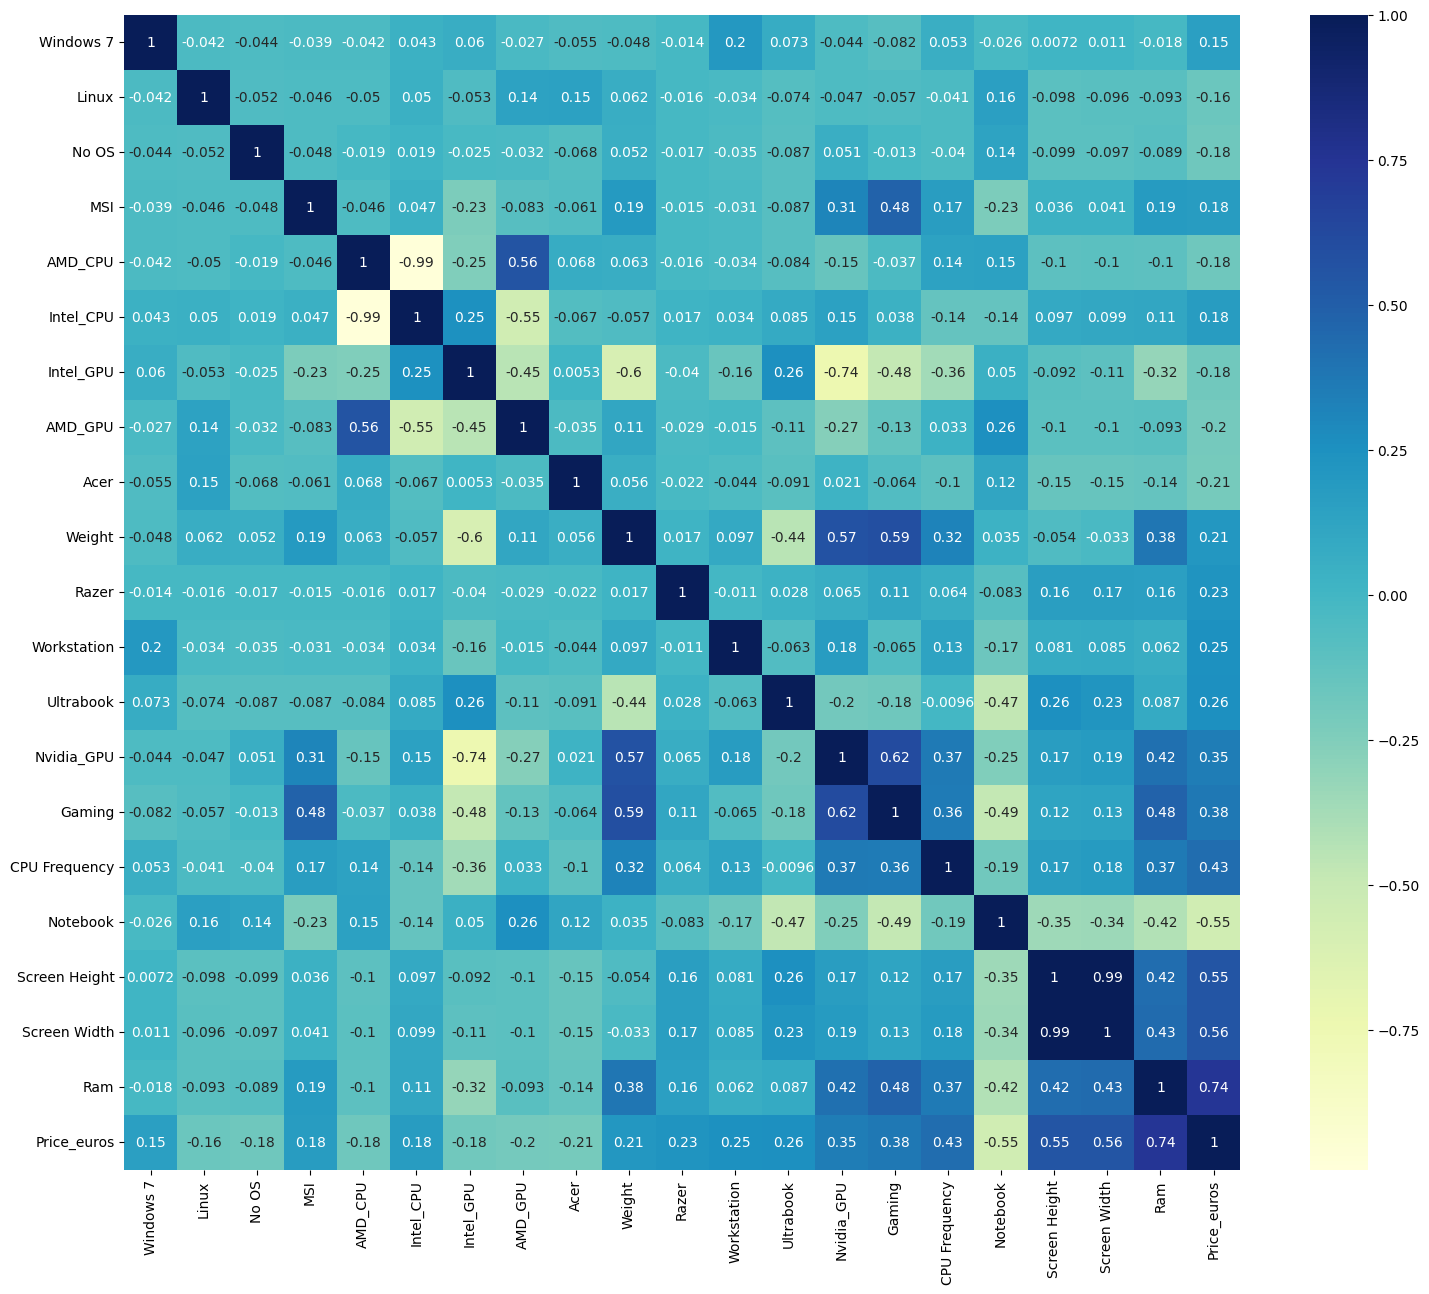

In [27]:
plt.figure(figsize=(18, 15))
sns.heatmap(limited_df.corr(), annot=True, cmap="YlGnBu")

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = limited_df.drop("Price_euros", axis=1), limited_df["Price_euros"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
forest = RandomForestRegressor()

forest.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
forest.score(X_test_scaled, y_test)

0.79922877183627

In [31]:
y_pred = forest.predict(X_test_scaled)

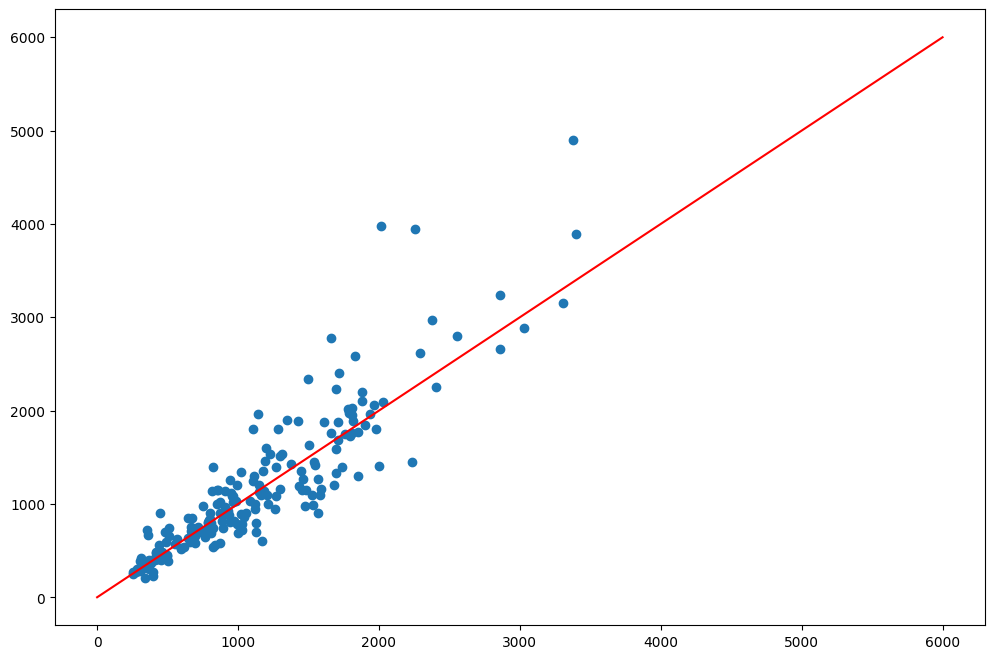

In [32]:
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, y_test)
plt.plot(range(0, 6000), range(0, 6000), c="red")

In [33]:
X_test.iloc[0]

Windows 7           0.00
Linux               0.00
No OS               0.00
MSI                 0.00
AMD_CPU             0.00
Intel_CPU           1.00
Intel_GPU           1.00
AMD_GPU             0.00
Acer                0.00
Weight              1.91
Razer               0.00
Workstation         0.00
Ultrabook           0.00
Nvidia_GPU          0.00
Gaming              0.00
CPU Frequency       2.50
Notebook            1.00
Screen Height     768.00
Screen Width     1366.00
Ram                 8.00
Name: 450, dtype: float64

In [34]:
X_new_scaled = scaler.transform([X_test.iloc[0]])

C:\Users\Enrico\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [35]:
forest.predict(X_new_scaled)

array([661.897625])

In [36]:
y_test.iloc[0]

np.float64(589.0)